#Activity 1
A Tesla car that is driving in the highway from Lisbon-Porto is being observed by a Sentinel satellite. This satellite reported the following data to the police department: 

| time (s) | velocity ($m/s$) | windSpeed ($m/s$) | location (m) |
|--------------|:--------------|:--------------|:--------------|
| 100 | 28 | 0.05100 | 3401
| 121 | 30 | 0.05463 | 4004
| 143 | 25 | 0.04559 | 4561
| 159 | 38 | 0.06920 | 5308
| 182 | 34 | 0.06192 | 6032

##1.1 Estimate the values of the model $f(v, t) = a_o + a_1\text{ }v \text{ }t $
where the $v$ and $t$ variables are the velocity and time, respectively.

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn import linear_model

#Train data
trainData = np.array([[100, 121, 143, 159, 182], [28, 30, 25, 38, 34], [0.05100, 0.05463, 0.04559, 0.06920, 0.06192],\
                  [3401, 4004, 4561, 5308, 6032]], dtype=float)
trainData = np.transpose(trainData)

#The model proposed is f(v,t) = a0 + a1*v*t
vt = trainData[:, 0] * trainData[:, 1] #element wise multiplication
X_v_t = np.expand_dims(vt, axis=1) #(n,) to (n,1) array
X = np.ones((np.shape(X_v_t)[0], 1), dtype=float)
X = np.concatenate((X, X_v_t), axis = 1) #a0 + a1*x(1)
Xt = np.transpose(X)
Y = np.expand_dims(trainData[:, -1], axis=1)

#Linear Regression
M = Xt @ X
half1 = np.linalg.inv(M) #[n,m]@[m,n] = [n,n]
half2 = Xt @ Y #[n,m]@[i,j] = [n,j]
theta = half1 @ half2 #[n,n]@[n,j] = [n,j]
print(f'Coef = {theta[1]}')
print(f'Intercept = {theta[0]} ')

Coef = [0.62971639]
Intercept = [1860.85121463] 


In [ ]:
# Precticted values
Y_predict_f = X @ theta # Y = a0 + a1*x
print(f'Predicted = {Y_predict_f}')

Predicted = [[3624.05710602]
 [4146.72170955]
 [4112.08730811]
 [5665.59764171]
 [5757.53623462]]


In [ ]:
#Using scikit learn
model = linear_model.LinearRegression()
model.fit(X_v_t, Y)
print("Coef = ", model.coef_)
print("Intercept = ", model.intercept_)

Coef =  [[0.62971639]]
Intercept =  [1860.85121463]


In [ ]:
#Singular Value Decomposition (SVD) of the matrix (X.t X)
u, s, vh = np.linalg.svd(M, full_matrices=True)
print("SVD:\n s:", s)
#Model's error
MSE = mean_squared_error(Y, Y_predict_f)

SVD:
 s: [1.08594638e+08 4.47332770e-01]


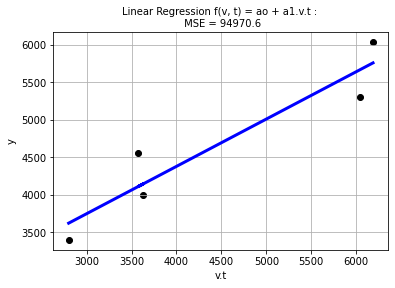

In [ ]:
plt.scatter(X_v_t, Y, color="black")
plt.plot(X_v_t, Y_predict_f,  color="blue", linewidth=3)
plt.grid()
title = 'MSE = {}'.format(round(MSE,2))
plt.title("Linear Regression f(v, t) = ao + a1.v.t : \n " + title,
          fontsize=10)
plt.xlabel('v.t')
plt.ylabel('y')
plt.show()

##1.2 Estimate the values of the model $g(v, t) = a_o + a_1 v t + a_2 (v t)^2$

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

#Train data
trainData = np.array([[100, 121, 143, 159, 182], [28, 30, 25, 38, 34], [0.05100, 0.05463, 0.04559, 0.06920, 0.06192],\
                  [3401, 4004, 4561, 5308, 6032]], dtype=float)
trainData = np.transpose(trainData)

#The model proposed is g(v,t) = a0 + a1*vt + a2*vt^2
vt = trainData[:, 0] * trainData[:, 1] #element wise multiplication
X_v_t = np.expand_dims(vt, axis=1) #(n,) to (n,1) array
X_v_t_squared = np.expand_dims(vt**2, axis=1)
#X_v_t_squared = np.expand_dims(np.multiply(vt, vt), axis=1)
X = np.ones((np.shape(X_v_t)[0], 1), dtype=float)
X = np.concatenate((X, X_v_t), axis = 1) #a0 + a1*x(1) + a2*x(2)
X = np.concatenate((X, X_v_t_squared), axis = 1) #a0 + a1*x(1) + a2*x(2)
Xt = np.transpose(X)
Y = np.expand_dims(trainData[:, -1], axis=1)

#Linear regression
M = Xt @ X #[n,m]@[m,n] = [n,n]
half1 = np.linalg.inv(M)
half2 = Xt @ Y #[n,m]@[i,j] = [n,j]
theta = half1 @ half2 #[n,n]@[n,j] = [n,j]
print(f'Coef = {np.transpose(theta[1:])}')
print(f'Intercept = {theta[0]} ')

Coef = [[ 1.69954134e+00 -1.15399906e-04]]
Intercept = [-390.29827289] 


In [ ]:
# Precticted values
Y_predict_g = X @ theta # Y = a0 + a1*x + a2x**2
print(f'Predicted = {Y_predict_g}')

Predicted = [[3463.68222885]
 [4258.42378705]
 [4210.6791108 ]
 [5665.56880045]
 [5707.64607285]]


In [ ]:
#Using scikit learn
nb_degree = 2
polynomial_features = PolynomialFeatures(degree = nb_degree)
X_TRANSF = polynomial_features.fit_transform(X_v_t)
model = linear_model.LinearRegression()
model.fit(X_TRANSF[:,[1,2]], Y)
print("Coef = ", model.coef_)
print("Intercept = ", model.intercept_)

Coef =  [[ 1.69954134e+00 -1.15399906e-04]]
Intercept =  [-390.29827289]


In [ ]:
#Singular Value Decomposition (SVD) of the matrix (X.t X)
u, s, vh = np.linalg.svd(M, full_matrices=True)
print("SVD:\n s:", s)
#Model's error
MSE = mean_squared_error(Y, Y_predict_g)

SVD:
 s: [3.19733860e+15 5.91016147e+06 9.73039434e-03]


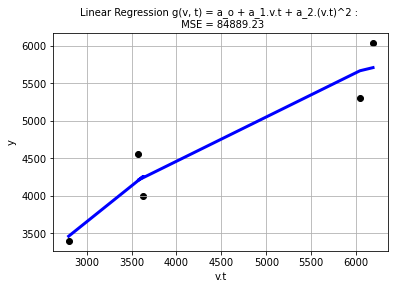

In [ ]:
### Plot
plt.scatter(X_v_t, Y, color="black")
plt.plot(X_v_t, Y_predict_g,  color="blue", linewidth=3)
plt.grid()
title = 'MSE = {}'.format(round(MSE,2))
plt.title("Linear Regression g(v, t) = a_o + a_1.v.t + a_2.(v.t)^2 : \n " + title,
          fontsize=10)
plt.xlabel('v.t')
plt.ylabel('y')
plt.show()

##1.3 Estimate the average squared error for both models ($f$ and $g$)

In [ ]:
def myMSE(realY, predY):
    n = np.shape(realY)[0]
    accSum = 0
    for i in range(0,n):
        accSum += (realY[i,0] - predY[i,0])**2

    accSum = accSum/n
    return accSum

#Model f
MSE_f = myMSE(Y,Y_predict_f)
print(f'MSE for model f = {MSE_f}')

#Model g
MSE_g = myMSE(Y,Y_predict_g)
print(f'MSE for model g = {MSE_g}')

MSE for model f = 94970.59914581395
MSE for model g = 84889.2335498686


##1.4 Estimate the values of the model $h(v, w, t) = a_o + a_1vt + a_2 w t$ 

Consider the WindSpeed feature that is provided by the Sentinel Satellite. The model has an unique solution?

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

#Train data
trainData = np.array([[100, 121, 143, 159, 182], [28, 30, 25, 38, 34], [0.05100, 0.05463, 0.04559, 0.06920, 0.06192],\
                  [3401, 4004, 4561, 5308, 6032]], dtype=float)
trainData = np.transpose(trainData)

#The model proposed is h(v,t) = a0 + a1*vt + a2*wt
vt = trainData[:, 0] * trainData[:, 1] #element wise multiplication
wt = trainData[:, 0] * trainData[:, 2] #element wise multiplication
X_v_t = np.expand_dims(vt, axis=1) #(n,) to (n,1) array
X_w_t = np.expand_dims(wt, axis=1)
X = np.ones((np.shape(X_v_t)[0], 1), dtype=float)
X = np.concatenate((X, X_v_t), axis = 1) #a0 + a1*x(1) + a2*x(2)
X = np.concatenate((X, X_w_t), axis = 1) #a0 + a1*x(1) + a2*x(2)
Xt = np.transpose(X)
Y = np.expand_dims(trainData[:, -1], axis=1)

#Linear regression
M = Xt @ X
half1 = np.linalg.inv(M)
half2 = Xt @ Y
theta = half1 @ half2
print(f'Coef = {np.transpose(theta[1:])}')
print(f'Intercept = {theta[0]} ')

Coef = [[ -135.441394   74755.71201761]]
Intercept = [1420.30169213] 


In [ ]:
# Precticted values
Y_predict_h = X @ theta
print(f'Predicted = {Y_predict_h}')

Predicted = [[3438.52976897]
 [3920.49170547]
 [4577.46438181]
 [5605.54730349]
 [5763.96683119]]


In [ ]:
#Using scikit learn
model = linear_model.LinearRegression()
sliceX = np.c_[np.ones(X.shape[0]), X[:,1:]]
model.fit(sliceX, Y)
print("Coef = ", model.coef_[:,1:])
print("Intercept = ", model.intercept_)

Coef =  [[ -135.44139394 74755.71198008]]
Intercept =  [1420.301698]


In [ ]:
#Singular Value Decomposition (SVD) of the matrix (X.t X)
u, s, vh = np.linalg.svd(M, full_matrices=True)
print("SVD:\n s:", s)
#Model's error
MSE = mean_squared_error(Y, Y_predict_h)

SVD:
 s: [1.08594998e+08 4.47348305e-01 5.47224762e-05]


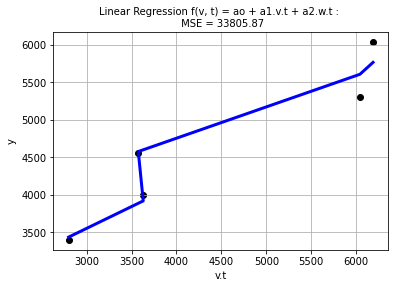

In [ ]:
###Plot
plt.scatter(X_v_t, Y, color="black")
plt.plot(X_v_t, Y_predict_h,  color="blue", linewidth=3)
plt.grid()
title = 'MSE = {}'.format(round(MSE,2))
plt.title("Linear Regression f(v, t) = ao + a1.v.t + a2.w.t : \n " + title,
          fontsize=10)
plt.xlabel('v.t')
plt.ylabel('y')
plt.show()

When $X^{T} X$ is invertible (which is the case), the normal equation directly implies $\theta^{∗} = (X^{T} X) − X^{T} y $ is the unique solution of linear regression [1].

[1] - http://web.cs.ucla.edu/~chohsieh/teaching/CS260_Winter2019/notes_linearregression.pdf

##1.5 Stochastic gradient descent

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
<ipython-input-33-e102950feb63>:62: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(X_v_t, Y_predict,  'y', label='iterative SGD', color='blue')


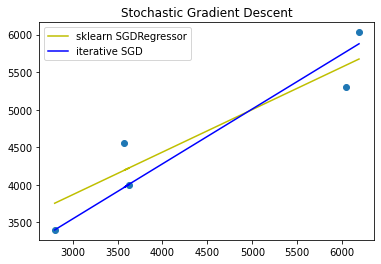

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import SGDRegressor

#Train data
trainData = np.array([[100, 121, 143, 159, 182], [28, 30, 25, 38, 34], [0.05100, 0.05463, 0.04559, 0.06920, 0.06192],\
                  [3401, 4004, 4561, 5308, 6032]], dtype=float)
trainData = np.transpose(trainData)

#The model proposed is g(v,t) = a0 + a1*vt + a2*wt
vt = trainData[:, 0] * trainData[:, 1] #element wise multiplication
wt = trainData[:, 0] * trainData[:, 2] #element wise multiplication
X_v_t = np.expand_dims(vt, axis=1) #(n,) to (n,1) array
X_w_t = np.expand_dims(wt, axis=1)
X_train = np.ones((np.shape(X_v_t)[0], 1), dtype=float)
X_train = np.concatenate((X_train, X_v_t), axis = 1) #a0 + a1*x(1) + a2*x(2)
X_train = np.concatenate((X_train, X_w_t), axis = 1) #a0 + a1*x(1) + a2*x(2)
Xt_train = np.transpose(X_train)
Y_train = np.expand_dims(trainData[:, -1], axis=1)

# scaler for normalization
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
X = scaler_x.fit_transform(X_train)
Xt = np.transpose(X)
Y = scaler_y.fit_transform(Y_train)
#print("Training:", X)
#print("Label:", Y)

lrate = 0.005
n_epochs = 300
n_samples = X.shape[0]

#Initialization of theta
theta = np.random.rand(X.shape[1], 1)
#In stochastic gradient descent, you calculate the gradient using just a random small part of the observations instead of all of them.
for itr in range(n_epochs):
    isample = np.random.randint(0, X.shape[0])
    Y_predict = X[isample] @ theta
    Y_residuals = np.subtract(Y_predict, Y[isample])
    Loss = (Y_residuals ** 2).mean()
    grad_loss = 2*X[isample]*Y_predict - 2*X[isample]*Y[isample]
    grad_loss = np.reshape(grad_loss, (X.shape[1], 1))
    #print('Iter i:', itr, '  Loss:', Loss)
    theta = theta - lrate*grad_loss

Y_predict = scaler_y.inverse_transform(X @ theta) #reverse transformation

#Using sklearn
model_sgd = SGDRegressor(learning_rate='constant', eta0 = lrate, alpha=0, early_stopping=False, max_iter=n_epochs, tol=1e-9)
X = X[:, 1:]
# Fit model based on data
model_sgd.fit(X , Y.reshape(n_samples))
# Use the model
yfit_sgd = model_sgd.predict(X)
yfit_sgd = scaler_y.inverse_transform(yfit_sgd.reshape(-1, 1)) #reverse transformation

#Plot regression line
plt.scatter(X_v_t, Y_train)
plt.plot(X_v_t, yfit_sgd,  'y', label='sklearn SGDRegressor')
plt.plot(X_v_t, Y_predict,  'y', label='iterative SGD', color='blue')
plt.legend()
plt.title('Stochastic Gradient Descent')
plt.show()